# Project: Investigate Medical Appointment Data

## Introduction

In this project, I'm investigating a dataset that contains around 100,000 records of medical appointments in Brazil. The dataset has 'No-show' as the dependent variable which tells whether a patient fulfilled his/her appointment or not.

I'm interested in exploring:


Q1. How do the different genders fair when it comes to fulfilling appointments?


Q2. Which neighbourhoods have the highest no-show proportions?

Q3. How do different age groups perform in fulfilling medical appointments?

Importing the packages required for analysis

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

## Data Wrangling

### Gathering Data

Loading the csv file into a Pandas DataFrame

In [54]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

### Assessing the Data

In [55]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Check for duplicate rows

In [57]:
sum(df.duplicated())

0

In [58]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

Two gender types: F and M

In [59]:
df['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

81 neighbourhoods

In [60]:
df['Scholarship'].value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

Two Categories: 0(No) or 1(Yes)

In [61]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

Two categories : "No" or "Yes"

In [62]:
df['SMS_received'].value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

Two categories: 0(No) or 1(Yes)

In [63]:
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [64]:
df['Alcoholism'].value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

Two categories: 0(No) or 1(Yes)

In [65]:
df['Diabetes'].value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

Two categories: 0(No) or 1(Yes)

In [66]:
df['Hipertension'].value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

Two categories: 0(No) or 1(Yes)

### Data Cleaning

We have 110527 rows and 14 columns.


We see that there are no null values in the dataset and hence we don't need to handle any missing data

There are no duplicate rows in our dataset

We see that No-show is our independent variable. We can investigate how the gender of a person relates to him/her showing up for an appointment. In addition to gender, we can similarly investigate how the age and neighbourhood can indicate a person fulfilling his/her appointment. 

The PatientId is quite ambiguous and irrelevant for our investigation and hence can be dropped.

ScheduledDay and AppointmentDay are not needed for the present investigation and hence can be dropped.

The Handcap column is ambiguous as we don't have details about the categories. Hence, we'll drop it

For our present investigation, Scholarship, Hipertension, Diabetes, Alcoholism, SMS_received are not required

Now we'll drop the columns that are not required

In [67]:
df.drop(columns=['PatientId', 'ScheduledDay', 'AppointmentDay', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received'], inplace=True)

In [68]:
df.head()

,AppointmentID,Gender,Age,Neighbourhood,No-show
0,5642903,F,62,JARDIM DA PENHA,No
1,5642503,M,56,JARDIM DA PENHA,No
2,5642549,F,62,MATA DA PRAIA,No
3,5642828,F,8,PONTAL DE CAMBURI,No
4,5642494,F,56,JARDIM DA PENHA,No


Rename Columns for Convenience

In [69]:
df.rename(columns={'AppointmentID': 'appointment_id', 'Age': 'age', 'Gender': 'gender', 'Neighbourhood': 'neighbourhood', 'No-show': 'no_show'}, inplace=True)

In [70]:
df.head()

,appointment_id,gender,age,neighbourhood,no_show
0,5642903,F,62,JARDIM DA PENHA,No
1,5642503,M,56,JARDIM DA PENHA,No
2,5642549,F,62,MATA DA PRAIA,No
3,5642828,F,8,PONTAL DE CAMBURI,No
4,5642494,F,56,JARDIM DA PENHA,No


## Exploratory Data Analysis

### Q1. How do the different genders fair when it comes to fulfilling appointments?

First, let's look at how gender relates to no-shows

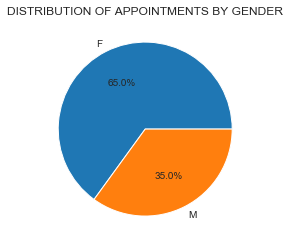

In [72]:
plt.pie(df['gender'].value_counts(), labels=['F', 'M'], autopct='%1.1f%%')
plt.title('DISTRIBUTION OF APPOINTMENTS BY GENDER');

No. of females is significantly higher than males

Above are the total counts of both genders.
We create two DataFrames below, one where the patients didn't show up and one where they did show up

In [73]:
df_no_show = df.query('no_show == "Yes"')

In [74]:
df_show = df.query('no_show == "No"')

Let's store the counts of both genders in Pandas Series

In [75]:
total_count_genders = df['gender'].value_counts()
total_count_genders

F    71840
M    38687
Name: gender, dtype: int64

Now, let's see gender counts for df_no_show and df_show

In [76]:
no_show_gender_counts = df_no_show['gender'].value_counts()
no_show_gender_counts

F    14594
M     7725
Name: gender, dtype: int64

In [77]:
show_gender_counts = df_show['gender'].value_counts()
show_gender_counts

F    57246
M    30962
Name: gender, dtype: int64

To make a uniform comparison between the genders, let's calculate the proportions of gender counts for shows and no-shows

In [78]:
no_show_gender_proportions = no_show_gender_counts/total_count_genders
no_show_gender_proportions

F    0.203146
M    0.199679
Name: gender, dtype: float64

In [79]:
show_gender_proportions = show_gender_counts/total_count_genders
show_gender_proportions

F    0.796854
M    0.800321
Name: gender, dtype: float64

We observe that the proportions of genders showing up and not showing up are almost similar

Let's plot our findings

In [80]:
sns.set_style('darkgrid')

In [81]:
ind = np.arange(len(show_gender_proportions))

In [82]:
width = 0.35

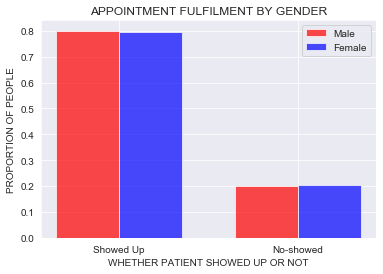

In [83]:
male_bar = plt.bar(ind, [show_gender_proportions['M'], no_show_gender_proportions['M']], width, color='r', alpha=0.7, label='Male')
female_bar = plt.bar(ind+width, [show_gender_proportions['F'], no_show_gender_proportions['F']], width, color='b', alpha=0.7, label='Female')
plt.title('APPOINTMENT FULFILMENT BY GENDER')
plt.xlabel('WHETHER PATIENT SHOWED UP OR NOT')
plt.ylabel('PROPORTION OF PEOPLE')
locations = ind+width/2
labels = ['Showed Up', 'No-showed']
plt.xticks(locations, labels)
plt.legend();

Thus, we can clearly see that about 80% of the people of both genders showed-up for their appointments whereas about 20% didn't.

### Q2. Which neighbourhoods have the highest no-show proportions?

Now, let's see which are the neighbourhoods with the most no-shows

In [84]:
no_show_neighbourhoods_patient_count = df_no_show['neighbourhood'].value_counts()
no_show_neighbourhoods_patient_count

JARDIM CAMBURI                 1465
MARIA ORTIZ                    1219
ITARARÉ                         923
RESISTÊNCIA                     906
CENTRO                          703
                               ... 
PONTAL DE CAMBURI                12
ILHA DO BOI                       3
ILHAS OCEÂNICAS DE TRINDADE       2
ILHA DO FRADE                     2
AEROPORTO                         1
Name: neighbourhood, Length: 80, dtype: int64

We observe that there are 80 neighbourhoods in our DataFrame.

Let's try and get the proportion of no-shows relative to the original neighbourhood counts

In [85]:
patients_by_neighbourhood = df['neighbourhood'].value_counts()

In [86]:
neighbourhood_proportions = no_show_neighbourhoods_patient_count/patients_by_neighbourhood

Let's try to get the top 5 neighbourhoods with the most no-show proportions

In [87]:
neighbourhood_proportions.sort_values(ascending=False, inplace=True)
neighbourhood_proportions

ILHAS OCEÂNICAS DE TRINDADE    1.000000
SANTOS DUMONT                  0.289185
SANTA CECÍLIA                  0.274554
SANTA CLARA                    0.264822
ITARARÉ                        0.262664
                                 ...   
SOLON BORGES                   0.147122
MÁRIO CYPRESTE                 0.145553
AEROPORTO                      0.125000
ILHA DO BOI                    0.085714
PARQUE INDUSTRIAL                   NaN
Name: neighbourhood, Length: 81, dtype: float64

In [88]:
top_no_show_neighbourhoods = neighbourhood_proportions.head(5)
top_no_show_neighbourhoods

ILHAS OCEÂNICAS DE TRINDADE    1.000000
SANTOS DUMONT                  0.289185
SANTA CECÍLIA                  0.274554
SANTA CLARA                    0.264822
ITARARÉ                        0.262664
Name: neighbourhood, dtype: float64

Let's plot these

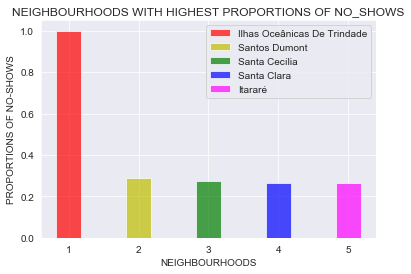

In [90]:
width = 0.35
plt.bar(1, top_no_show_neighbourhoods[0], width, color='r', alpha=0.7, label=top_no_show_neighbourhoods.index[0].title())
plt.bar(2, top_no_show_neighbourhoods[1], width, color='y', alpha=0.7, label=top_no_show_neighbourhoods.index[1].title())
plt.bar(3, top_no_show_neighbourhoods[2], width, color='g', alpha=0.7, label=top_no_show_neighbourhoods.index[2].title())
plt.bar(4, top_no_show_neighbourhoods[3], width, color='b', alpha=0.7, label=top_no_show_neighbourhoods.index[3].title())
plt.bar(5, top_no_show_neighbourhoods[4], width, color='magenta', alpha=0.7, label=top_no_show_neighbourhoods.index[4].title())
plt.title('NEIGHBOURHOODS WITH HIGHEST PROPORTIONS OF NO_SHOWS')
plt.xlabel('NEIGHBOURHOODS')
plt.ylabel('PROPORTIONS OF NO-SHOWS')
plt.legend();

### Q3. How do different age groups perform in fulfilling medical appointments?

Let's try and see no-shows by age groups

In [91]:
df['age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [93]:
df[df['age'] == df['age'].min()]

,appointment_id,gender,age,neighbourhood,no_show
99832,5775010,F,-1,ROMÃO,No


We see that the minimum age in the database is -1, which is ambiguous. Hence, we'll remove that row from the database

In [94]:
df.drop(99832, inplace=True)

In [96]:
df['age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

Now, let's use Pandas' cut function to distribute ages into groups. We'll create groups using the values obtained from describe(), i.e., the 5 number summary

In [97]:
bin_edges = [0, 18.00, 37.00, 55.00, 115.00]

In [98]:
bin_names = ['Children', 'Young Adults', 'Middle-Aged', 'Seniors']

We now create a new column for age-group in the DataFrame

In [99]:
df['age_group'] = pd.cut(df['age'], bin_edges, labels=bin_names)

Let's check our DataFrame

In [100]:
df.head()

,appointment_id,gender,age,neighbourhood,no_show,age_group
0,5642903,F,62,JARDIM DA PENHA,No,Seniors
1,5642503,M,56,JARDIM DA PENHA,No,Seniors
2,5642549,F,62,MATA DA PRAIA,No,Seniors
3,5642828,F,8,PONTAL DE CAMBURI,No,Children
4,5642494,F,56,JARDIM DA PENHA,No,Seniors


Let us group the DataFrame by these age-groups and try to see no-shows according to age-groups

In [101]:
no_show_counts_by_age_group = df.groupby(['age_group', 'no_show'])['appointment_id'].count()
no_show_counts_by_age_group

age_group     no_show
Children      No         19619
              Yes         5708
Young Adults  No         20836
              Yes         6414
Middle-Aged   No         21651
              Yes         5255
Seniors       No         23201
              Yes         4303
Name: appointment_id, dtype: int64

Text(0.5, 1.0, 'DISTRIBUTION OF APPOINTMENTS BY AGE GROUPS')

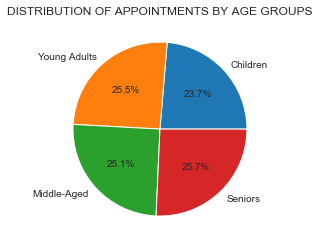

In [103]:
total_appointments_by_age_groups = df.groupby('age_group')['appointment_id'].count()
total_appointments_by_age_groups
plt.pie(total_appointments_by_age_groups, labels=bin_names, autopct='%1.1f%%')
plt.title('DISTRIBUTION OF APPOINTMENTS BY AGE GROUPS')

Looks like appointments are evenly distributed among the age groups

Let's try to get the proportions of no-shows for all age-groups

In [104]:
children_proportions = no_show_counts_by_age_group['Children']/total_appointments_by_age_groups['Children']
children_proportions

no_show
No     0.774628
Yes    0.225372
Name: appointment_id, dtype: float64

In [106]:
adult_proportions = no_show_counts_by_age_group['Young Adults']/total_appointments_by_age_groups['Young Adults']
adult_proportions

no_show
No     0.764624
Yes    0.235376
Name: appointment_id, dtype: float64

In [107]:
middle_proportions = no_show_counts_by_age_group['Middle-Aged']/total_appointments_by_age_groups['Middle-Aged']
middle_proportions

no_show
No     0.80469
Yes    0.19531
Name: appointment_id, dtype: float64

In [108]:
senior_proportions = no_show_counts_by_age_group['Seniors']/total_appointments_by_age_groups['Seniors']
senior_proportions

no_show
No     0.84355
Yes    0.15645
Name: appointment_id, dtype: float64

Now, let us plot these values

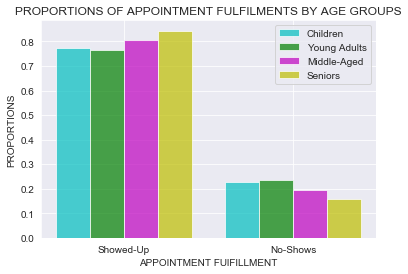

In [109]:
ind = np.arange(len(children_proportions))
width=0.2
child_bars = plt.bar(ind, children_proportions, width, color='c', alpha=0.7, label='Children')
adult_bars = plt.bar(ind+width, adult_proportions, width, color='g', alpha=0.7, label='Young Adults')
middle_bars = plt.bar(ind+width*2, middle_proportions, width, color='m', alpha=0.7, label='Middle-Aged')
senior_bars = plt.bar(ind+width*3, senior_proportions, width, color='y', alpha=0.7, label='Seniors')
plt.ylabel('PROPORTIONS')
plt.xlabel('APPOINTMENT FUlFILLMENT')
plt.title('PROPORTIONS OF APPOINTMENT FULFILMENTS BY AGE GROUPS')
locations = ind+ 1.5*width
labels = ['Showed-Up', 'No-Shows']
plt.xticks(locations, labels)
plt.legend();

Looks like Young Adults had maximum no-shows while Seniors had the least

## Conclusions

1. About 80% of the people of both genders showed-up for their appointments whereas about 20% didn't.

2. Neighbourhoods with the highest proportions of no-shows are:

(a) Ilhas Oceanicas de Trindade

(b) Santos Dumont

(c) Santa Cecilia

(d) Santa Clara 

(e) Itarare

3. Young Adults (18-37 years) had maximum no-shows while Seniors (55+ years) had the least

## References

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html

https://pandas.pydata.org/pandas-docs/stable/